## Basic statistics. 
***Let's load data from country.csv file in jupyter, we are going to obtain statistical information about the data damain. We will explain the process step by step using several Pharo frameworks.***


First of all, be sure NeoCSV, DataFrame and Roassal are installed in your Image, next step, before loading country.csv file, examine this file opening in your fabourite text editor, check the character encoding, its character separator and decimal point character. As you will see, it's windows-1258 encoded, separated by ';' and it uses european floating point format, ',' is  the decimal point.<br/>
We use Zinc Streams and NeoCSV to encode the content and load it into an Array. <br/>
Let's create a DataFrame, due to this Array has a first row containing the column headers, we need to create the DataFrame from rows starting from two up to the end. We will assing the columns names from the first row in the array.  



In [1]:

"this file is windows-1258 encoded so we have to load into Pharo kernel using the correct encoding"

stream := ZnCharacterReadStream 
                on:'/Users/Cat/Dropbox/Master Ciencia de les dades/S1.1.mineria de dades/PAC2/countries.csv'
                        asFileReference binaryReadStream
                encoding: #windows1258.
                
                  
arrayOfRows := (NeoCSVReader on: stream)
                            separator: $;;
                            upToEnd.

paisos := DataFrame fromRows:(arrayOfRows copyFrom:2 to:arrayOfRows size).
paisos columnNames: (arrayOfRows at:1)

Let's show rows from one to thirty three including its heading. Note that encoding is correct

In [2]:
"JupyterTalk will transform those Strings to utf-8, look at:#32 Cameroon | Yaoundé"
self display openInJupyter: (OrderedCollection new 
                                    add:paisos columnNames;
                                    addAll: (paisos asArrayOfRows copyFrom:1 to:33);
                                    yourself) .

NAME,CAPITAL,TOTAL_AREA_KM2,POPULATION,DENSITY_KM2,CONTINENT,URBAN_POPULATION,RURAL_POPULATION,CRUDE_OIL_BAR_DAY,OIL_RES_MIL_BAR,GAS_TONS,GAS_RES_MIL_M_3,GDP_MILLION_$,GDP_GROW_RATE,GDP_$_PER_CAPITA,DOCTORS,ILLITERACY,PRIMARY_SECTOR,SECONDARY_SECTOR,TERTIARY_SECTOR,PHONES_RATE,NATURAL_GROWTH,MEM_LIFE_EXP,WOMEN_LIFE_EXP,MAIN_SECTOR,MAIN_GROUP
Afghanistan,Kabul,647500,24326959,"37,6",Asia,20,80,nil,nil,nil,nil,0,0,600,4797,nil,57,13,29,0,26,47,46,Primary,Rural
Albania,Tirane,28750,3453505,"120,1",Europe,37,63,nil,nil,nil,nil,4100,6,1210,574,0,50,nil,18,nil,"19,9","69,9","75,5",Primary,Rural
Algeria,Algiers,2381740,29181456,"12,3",Africa,56,44,1395000,9200,59300000,3700000,108700,"3,5",3800,1119,50,13,24,36,"0,03","28,3","65,8","66,6",Tertiary,Urban
Andorra,Andorra la Vella,450,67569,"150,2",Europe,nil,nil,nil,nil,nil,nil,1000,0,16200,nil,nil,nil,nil,nil,nil,nil,nil,nil,nil,nil
Angola,Luanda,1246700,10339364,"8,3",Africa,32,68,nil,nil,nil,nil,7400,4,700,13489,72,71,nil,18,0,27,"42,9","46,1",Primary,Rural
Antigua & Barbuda,Saint John's,440,65619,"149,1",America,36,64,nil,nil,nil,nil,0,"4,2",6600,nil,nil,nil,18,72,nil,"9,5",70,73,Tertiary,Rural
Argentina,Buenos Aires,2766890,34673391,"12,5",America,88,12,805000,nil,nil,nil,0,"-4,4",8100,340,nil,nil,30,50,"0,1",11,67,74,Tertiary,Urban
Armenia,Yerevan,29800,3590722,"120,5",Asia,69,31,nil,nil,nil,nil,0,"5,2",2560,nil,nil,nil,nil,nil,nil,15,nil,nil,nil,Urban
Australia,Canberra,7686850,18562252,"2,4",Oceania,85,15,615000,nil,nil,nil,405400,"3,3",22100,438,nil,5,15,72,"0,47","8,4","73,3","79,6",Tertiary,Urban
Austria,Vienna,83850,8014617,"95,6",Europe,56,44,nil,nil,nil,nil,152000,"2,4",19000,345,0,7,35,55,"0,53","0,9","72,1","78,8",Tertiary,Urban


Now, let's get a basic boxplot from 'URBAN_POPULATION' column. We need to change the column type from String to Integer. <br/>
The BoxPlot is part of the Roassal Package. DataFrame has helper methods to draw basic statistical drawings using Roassal.

In [3]:
"CONVERT URBAN_POPULATION TO INTEGER"

newCol := (paisos column:#URBAN_POPULATION) collect:[:v| v ifNil:[0] ifNotNil:[v asInteger]].
paisos column:#URBAN_POPULATION put:newCol.


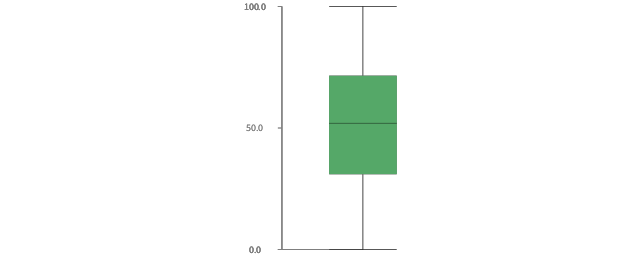

In [4]:
b := (paisos column:#URBAN_POPULATION) boxplot.
self display openInJupyter: b

Now, let's create a histogram from a quantitative column. We will use POPULATION column, 
first we need to change column type to Integer, calculate maximun and minimun using DataSerie methods min and max.<br/>
We will use a Bag in order to categorize the POPULATION column

In [5]:
"CONVERT POPULATION TO INTEGER"

newCol := (paisos column:#POPULATION) collect:[:v| v ifNil:[nil] ifNotNil:[v asInteger]].
paisos column:#POPULATION put:newCol.
maxPopulation := (paisos column:#POPULATION) max.
minPopulation := (paisos column:#POPULATION) min.
domainSize := maxPopulation - minPopulation.
bag := Bag new.
newCol do:[:each| bag add:((((each - minPopulation)/ domainSize*100) asInteger) ) ]

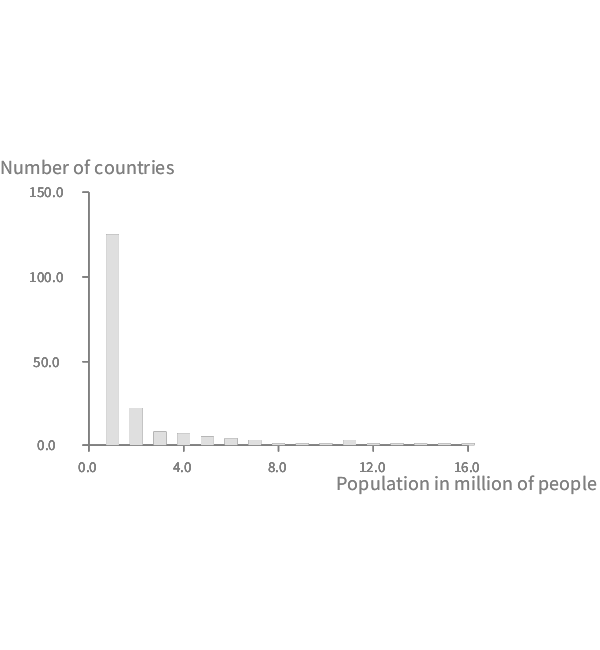

In [14]:
b:= RTGrapher new.
ds := RTData new.
ds barShape width: 10.
ds points: bag valuesAndCounts.
b add: ds.

uuid :=self display openInJupyter: b  extent:600@650

We can modify an object shown in other response. #openInJupyter returns an uuid for each displayed object.
we can use this uuid to refresh the picture after we change any of its properties.

In [15]:
"we can modify an object shown in other response."
b axisX title:'Population in million of people'.
b axisY title:'Number of countries'.
self display refresh: uuid


Let's visualize a nice drawing using Roassal. We can interact with our drawing.<br/>
We need to include the Roassal javascript libraey in our jupyter markdown document.


In [8]:
self loadScript: IPRoassal js

In [17]:
| view coll col2 n b |
view := RTView new.
coll := (paisos column:#POPULATION).
n := RTMultiLinearColorForIdentity new objects: coll.
coll
    doWithIndex: [ :r :index | 
        view
            add:
            ((RTBox new
                color: [ :value | n rtValue: r ];
                size: r/ 1000)
            elementOn: index) ].
col2 := (paisos column:#NAME).
RTFlowLayout new applyOn: view elements.
view elements do: [ :e | e @ (RTPopup text: [ :el | col2 at:el ]) ].
view @ RTDraggableView.
b := RTAxisAdaptedBuilder new.
b view: view.
b margin: 20.
b objects: view elements.
b build.

self display 
        interactionOn;
        openInJupyter: b extent:650@640

Now, let's get a barchar showing the number of countries in each continent. We use a Bag to get a count for each continent.

In [43]:
bag := Bag new.
(paisos column:#CONTINENT) do:[:each| bag add:each ]

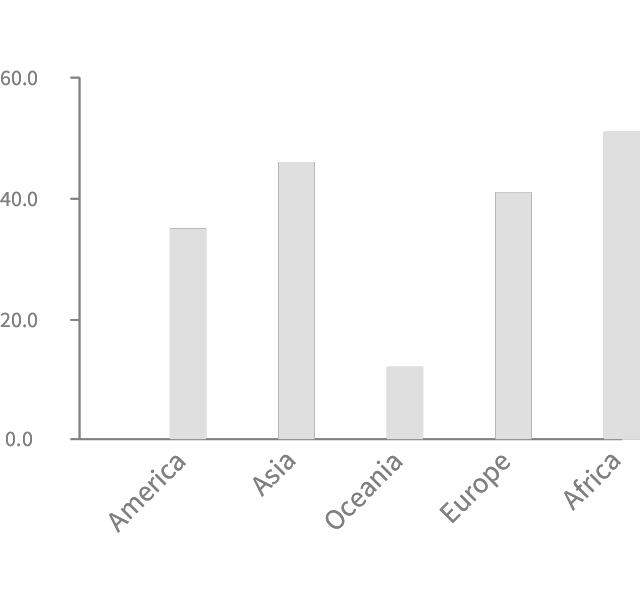

In [44]:
b:= RTGrapher new.
ds := RTData new.
ds barShape width: 20.
ds interaction highlight.
ds points: bag valuesAndCounts associations.
ds y: [:each| each value].
ds barChartWithBarTitle: [:each|each key].
b add: ds.
b axisX
	noTick;
	noLabel.

self display openInJupyter: b extent:640@600

We will finish this tutorial getting basic statistcs from the column population.

In [46]:
self display openInJupyter:(paisos column:#POPULATION) summary asStringTable  

| POPULATION ---------+----------------- Min | 16954 1st Qu. | 1952975 Median | 5989065 Mean | 3.122843657e7 3rd Qu. | 20013660 Max | 1215609480